Importing libraries

In [590]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import string

%matplotlib inline

Reading Data

In [591]:
df= pd.read_csv(
  "sms-dataset.csv",
  encoding="latin-1",
  names = ["label","sms"],
  usecols=[0, 1], 
  header=0
)

df.head()


,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Descriptive Data Analysis

In [592]:
df["label_bool"] = df.label.map({"ham":0, "spam":1})
df['sms_len'] = df.sms.apply(len)
df.head()


,label,sms,label_bool,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Graphing Data

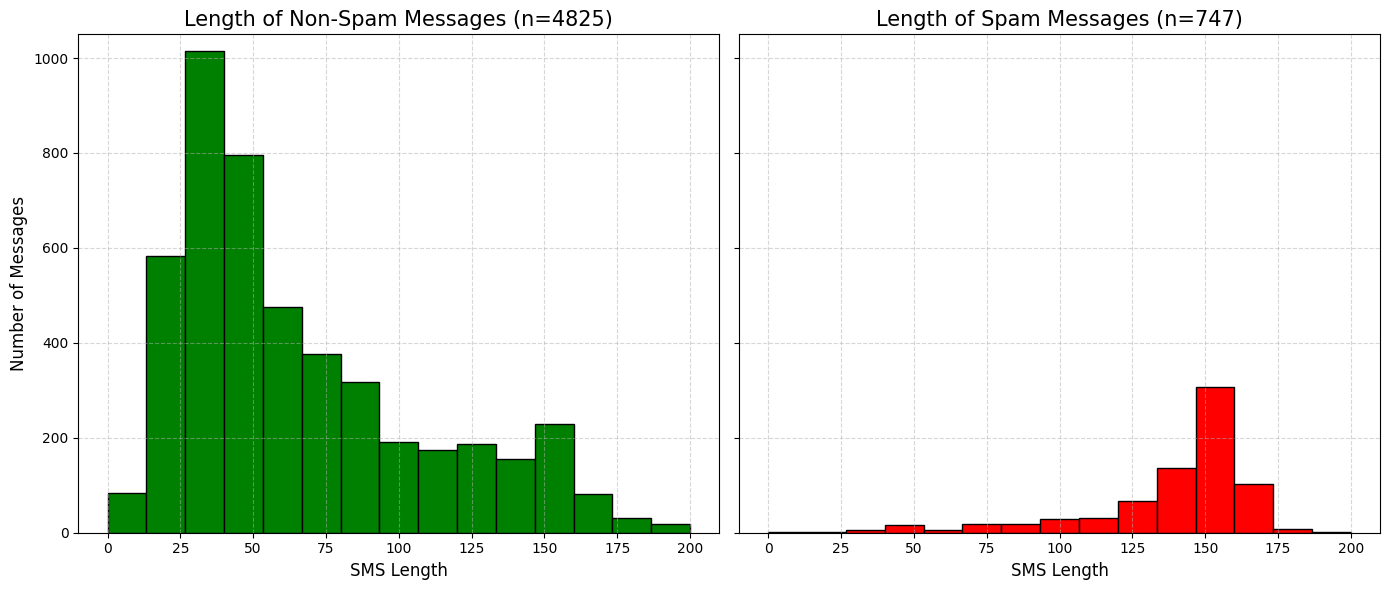

In [593]:
ham_sms = df[df["label"] == "ham"]
spam_sms = df[df["label"] == "spam"]

ham_count = len(ham_sms)
spam_count = len(spam_sms)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

ham_sms['sms_len'].plot(kind="hist", bins=15, color="green", ax=ax1, range=(0, 200), edgecolor="black")
spam_sms['sms_len'].plot(kind="hist", bins=15, color="red", ax=ax2, range=(0, 200), edgecolor="black")

ax1.set_title(f"Length of Non-Spam Messages (n={ham_count})", fontsize=15)
ax2.set_title(f"Length of Spam Messages (n={spam_count})", fontsize=15)

for ax in [ax1, ax2]:
    ax.set_xlabel("SMS Length", fontsize=12)
    ax.set_ylabel("Number of Messages", fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

ax1.set_ylim(0, 1050)
ax2.set_ylim(0, 1050)

plt.tight_layout()
plt.show()


Text Filtering

In [594]:
def filter_text(mess):
   
  STOPWORDS = ['u', 'u2', 'ur', 'r', 'im', 'ill', 'dont', '2', 'ok', ]+ stopwords.words('english') 

  no_punctuation = []
  for char in mess:
      if char not in string.punctuation:
          no_punctuation.append(char)
  
  no_punctuation = ''.join(no_punctuation)  
  words = no_punctuation.split()
  
  filtered_words = []
  for word in words:
      if word.lower() not in STOPWORDS:
          filtered_words.append(word.lower())
  
  return ' '.join(filtered_words)

df['filtered_sms'] = df.sms.apply(filter_text)
df[['label','filtered_sms']].head()


,label,filtered_sms
0,ham,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though


Most Used Words

In [595]:
def count_words(df, label):
    words = df[df.label == label].filtered_sms
    count = Counter()
    
    for sms in words:
        word_list = sms.split()
        count.update(word_list)
    
    most_common_words = count.most_common(5)
   
    return [(word, count) for word, count in most_common_words]

print("Most Common Ham Words:")
print(count_words(df, 'ham'))

print("\nMost Common Spam Words:")
print(count_words(df, 'spam'))


Most Common Ham Words:
[('get', 303), ('ltgt', 276), ('go', 247), ('know', 232), ('got', 231)]

Most Common Spam Words:
[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120)]


Vectorization

In [596]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df.filtered_sms
y = df.label_bool
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

features = vectorizer.get_feature_names_out()

tfidf_2Darray = X_train_tfidf[0].toarray()
tfidf_array = tfidf_2Darray.flatten()

sorted_indices = tfidf_array.argsort()[::-1]
top_indices = sorted_indices[:10]

 
print("Top 10 Words by TF-IDF Score\n"+ 28*"-")

for i in range(len(top_indices)):
    print(f" {i + 1:02} | {features[top_indices[i]]:^13} | {tfidf_array[top_indices[i]]:.4f}")


Top 10 Words by TF-IDF Score
----------------------------
 01 |      wer      | 0.5175
 02 |     plane     | 0.3288
 03 |   students    | 0.3173
 04 |     made      | 0.2596
 05 |    saidif     | 0.1725
 06 |    hurried    | 0.1725
 07 |   aeroplane   | 0.1725
 08 |  aeronautics  | 0.1725
 09 |  professors   | 0.1725
 10 |     calld     | 0.1725
